## Preparando Inputs
---

In [10]:
import sys
sys.path.append('/home/lelis/Documents/Projetos/Stereo_Multifocus/RobustPhotometricStereo/Codes/')
%load_ext autoreload
%autoreload 2

#%pip install psutil
import psutil as psutil

In [4]:
import numpy as np

def ler_arquivo_npy(caminho_arquivo):
    """
    Esta função lê um arquivo no formato .npy e retorna o conteúdo.
    
    Parâmetros:
    caminho_arquivo (str): O caminho para o arquivo .npy
    
    Retorna:
    numpy.ndarray: O conteúdo do arquivo .npy
    """
    return np.load(caminho_arquivo)

In [28]:
lights = ler_arquivo_npy('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/lights.npy')
lights.shape

(50, 3)

In [29]:
lights

array([[ 0.00000000e+00,  2.81732559e-01,  9.59492922e-01],
       [ 7.00640380e-02,  2.72881389e-01,  9.59492922e-01],
       [ 1.35725692e-01,  2.46884078e-01,  9.59493041e-01],
       [ 1.92859203e-01,  2.05374181e-01,  9.59492922e-01],
       [ 2.37874657e-01,  1.50959834e-01,  9.59492981e-01],
       [ 2.67943591e-01,  8.70601386e-02,  9.59493041e-01],
       [ 2.81176627e-01,  1.76901370e-02,  9.59492981e-01],
       [ 2.76742280e-01, -5.27914166e-02,  9.59492862e-01],
       [ 2.54919231e-01, -1.19955912e-01,  9.59492981e-01],
       [ 2.17078656e-01, -1.79583073e-01,  9.59492981e-01],
       [ 1.65598214e-01, -2.27926433e-01,  9.59492922e-01],
       [ 1.03712678e-01, -2.61948287e-01,  9.59492922e-01],
       [ 3.53104398e-02, -2.79511005e-01,  9.59492922e-01],
       [-3.53104249e-02, -2.79511005e-01,  9.59492922e-01],
       [-1.03712663e-01, -2.61948287e-01,  9.59492922e-01],
       [-1.65598258e-01, -2.27926388e-01,  9.59492862e-01],
       [-2.17078701e-01, -1.79583043e-01

In [30]:
lights[:,1] = -lights[:,1]
lights

array([[ 0.00000000e+00, -2.81732559e-01,  9.59492922e-01],
       [ 7.00640380e-02, -2.72881389e-01,  9.59492922e-01],
       [ 1.35725692e-01, -2.46884078e-01,  9.59493041e-01],
       [ 1.92859203e-01, -2.05374181e-01,  9.59492922e-01],
       [ 2.37874657e-01, -1.50959834e-01,  9.59492981e-01],
       [ 2.67943591e-01, -8.70601386e-02,  9.59493041e-01],
       [ 2.81176627e-01, -1.76901370e-02,  9.59492981e-01],
       [ 2.76742280e-01,  5.27914166e-02,  9.59492862e-01],
       [ 2.54919231e-01,  1.19955912e-01,  9.59492981e-01],
       [ 2.17078656e-01,  1.79583073e-01,  9.59492981e-01],
       [ 1.65598214e-01,  2.27926433e-01,  9.59492922e-01],
       [ 1.03712678e-01,  2.61948287e-01,  9.59492922e-01],
       [ 3.53104398e-02,  2.79511005e-01,  9.59492922e-01],
       [-3.53104249e-02,  2.79511005e-01,  9.59492922e-01],
       [-1.03712663e-01,  2.61948287e-01,  9.59492922e-01],
       [-1.65598258e-01,  2.27926388e-01,  9.59492862e-01],
       [-2.17078701e-01,  1.79583043e-01

In [31]:
np.save('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/lights.npy', lights)

In [9]:
bunny_img = ler_arquivo_npy('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/est_normal.npy')
bunny_img.shape

(256, 256, 3)

In [10]:
gt_normal = ler_arquivo_npy('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/gt_normal.npy')

In [11]:
gt_normal.shape

(256, 256, 3)

In [32]:
from  math import sqrt, hypot, acos, degrees, atan2, sin, cos
import pandas as pd

In [33]:
dataset_luzes = pd.read_csv('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/notebook/luzes_muff.csv')
dataset_luzes

,Linha,A,B,C,A1,B1,,D
0,L0,661,341,331,443,108,,38
1,L0,392,730,415,166,485,,109
2,L1,739,286,594,839,354,,-1
3,L1,634,510,355,279,165,,-1
4,L2,569,434,737,934,770,,1105
5,L2,774,347,475,685,238,,367
6,L3,326,693,675,593,954,,968
7,L3,716,417,735,979,642,,973
8,L4,304,720,408,182,656,,-1
9,L4,453,676,783,763,924,,-1


In [16]:
import cv2
import numpy as np

def desenhar_esfera(imagem_path, centro, raio, cor=(0, 255, 0), espessura=2):
    """
    Esta função lê uma imagem, desenha uma esfera na imagem e exibe a imagem resultante.
    
    Parâmetros:
    imagem_path (str): O caminho para a imagem.
    centro (tuple): As coordenadas (x, y) do centro da esfera.
    raio (int): O raio da esfera.
    cor (tuple): A cor da esfera em formato BGR. Padrão é verde (0, 255, 0).
    espessura (int): A espessura da linha da esfera. Padrão é 2.
    
    Retorna:
    None
    """
    # Ler a imagem
    imagem = cv2.imread(imagem_path)
    
    # Desenhar a esfera
    cv2.circle(imagem, centro, raio, cor, espessura)
    
    # Exibir a imagem resultante
    cv2.imshow('Imagem com Esfera', imagem)
    cv2.waitKey(0)
    cv2.destroyAllWindows()






In [17]:
dataset_luzes['lx'] = 0
dataset_luzes['ly'] = 0
dataset_luzes['lz'] = 0
dataset_luzes['R'] = 0
dataset_luzes['M'] = 0

In [18]:
i = 0

A = [dataset_luzes.loc[0]['A'], dataset_luzes.loc[1]['A']]
B = [dataset_luzes.loc[i]['B'], dataset_luzes.loc[i +1]['B']]
C = [dataset_luzes.loc[i]['C'], dataset_luzes.loc[i+1]['C']]
A1 = [dataset_luzes.loc[i]['A1'], dataset_luzes.loc[i+1]['A1']]
B1 = [dataset_luzes.loc[i]['B1'], dataset_luzes.loc[i+1]['B1']]
D = [dataset_luzes.loc[i]['D'], dataset_luzes.loc[i+1]['D']]

print(A, B, C, A1, B1, D)


lx, ly, lz, R, M = luz_direction(A,B,C,A1,B1,D)

print(lx, ly, lz, R, M)

[661, 392] [341, 730] [331, 415] [443, 166] [108, 485] [38, 109]
22.47220505424423
0.5676100663950113 0.5541247300443739 0.6089044227793887 224.0892679268688 [501, 561]


In [34]:
# Exemplo de uso

path_l0 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_00/V_00/align/frame_00000.png'
path_l1 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_01/V_00/align/frame_00000.png'
path_l2 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_02/V_00/align/frame_00000.png'
path_l3 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_03/V_00/align/frame_00000.png'
path_l4 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_04/V_00/align/frame_00000.png'
path_l5 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_05/V_00/align/frame_00000.png'

lista_path = [path_l0, path_l1, path_l2, path_l3, path_l4, path_l5]


In [35]:
dataset_result = pd.DataFrame(columns=['lx', 'ly', 'lz', 'R', 'M'])

In [2]:
for i in range(0,12, 2):
    print(i)
    print(i-i/2)

    A = [dataset_luzes.loc[i]['A'], dataset_luzes.loc[i+1]['A']]
    B = [dataset_luzes.loc[i]['B'], dataset_luzes.loc[i +1]['B']]
    C = [dataset_luzes.loc[i]['C'], dataset_luzes.loc[i+1]['C']]
    A1 = [dataset_luzes.loc[i]['A1'], dataset_luzes.loc[i+1]['A1']]
    B1 = [dataset_luzes.loc[i]['B1'], dataset_luzes.loc[i+1]['B1']]
    D = [dataset_luzes.loc[i]['D'], dataset_luzes.loc[i+1]['D']]

    #print(A, B, C, A1, B1, D)


    lx, ly, lz, R, M = light_direction(A,B,C,A1,B1,D)
    
    dataset_luzes.at[i, 'lx'] = lx
    dataset_luzes.at[i, 'ly'] = ly
    dataset_luzes.at[i, 'lz'] = lz

    dataset_result.at[int(i-i/2), 'lx'] = lx
    dataset_result.at[int(i-i/2), 'ly'] = ly
    dataset_result.at[int(i-i/2), 'lz'] = lz
    dataset_result.at[int(i-i/2), 'R'] = R
    dataset_result.at[int(i-i/2), 'M'] = M

    


    print(lx, ly, lz, R, M)

    desenhar_esfera(lista_path[int(i-i/2)], M, int(R), cor=(0, 255, 0), espessura=2)

0
0.0


NameError: name 'dataset_luzes' is not defined

In [23]:
dataset_result['ly'] = dataset_result['ly'] * -1

In [24]:
dataset_result

,lx,ly,lz,R,M
0,0.56761,-0.554125,0.608904,224.089268,"[501, 561]"
1,-0.191779,-0.794351,0.576392,231.976292,"[512, 572]"
2,-0.708016,-0.226237,0.668978,250.840587,"[501, 560]"
3,-0.563351,0.499529,0.658108,236.89027,"[509, 566]"
4,0.229526,0.689811,0.686644,242.439683,"[512, 564]"
5,0.733394,0.214112,0.645205,233.002146,"[502, 557]"


In [25]:
coordenate_list = [dataset_result.loc[i][['lx', 'ly', 'lz']].to_list() for i in range(0, dataset_result.shape[0])]
coordenate_list 

[[0.5676100663950113, -0.5541247300443739, 0.6089044227793887],
 [-0.19177892525591606, -0.7943505779830841, 0.5763922302439772],
 [-0.7080155492442399, -0.22623675662936787, 0.6689775123112895],
 [-0.5633513408981179, 0.4995294024957167, 0.6581076224680616],
 [0.22952550774072547, 0.6898105313283093, 0.686643628212567],
 [0.7333939535243345, 0.21411165757254058, 0.6452050116245887]]

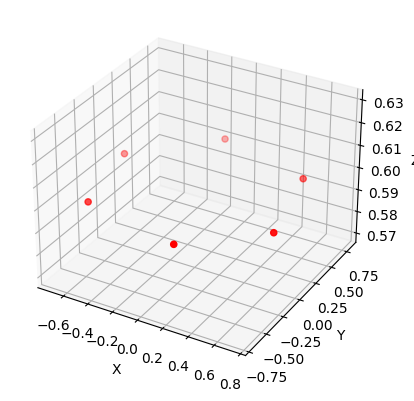

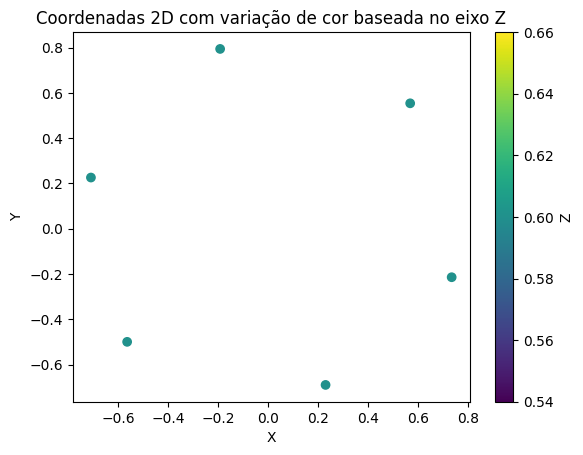

In [28]:
import numpy as np

import matplotlib.pyplot as plt

# Converter coordenate_list em um array numpy para facilitar a manipulação
coordenate_array = np.array(coordenate_list)

# Plotar as coordenadas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Adicionar os pontos ao gráfico
ax.scatter(coordenate_array[:, 0], coordenate_array[:, 1], coordenate_array[:, 2], c='r', marker='o')

# Adicionar rótulos aos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar o gráfico
plt.show()


# Plotar as coordenadas em 2D com variação de cor baseada no eixo Z
plt.figure()
plt.scatter(coordenate_array[:, 0], coordenate_array[:, 1], c=coordenate_array[:, 2], cmap='viridis')
plt.colorbar(label='Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Coordenadas 2D com variação de cor baseada no eixo Z')
plt.show()

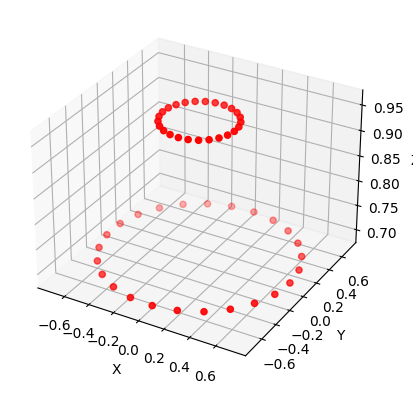

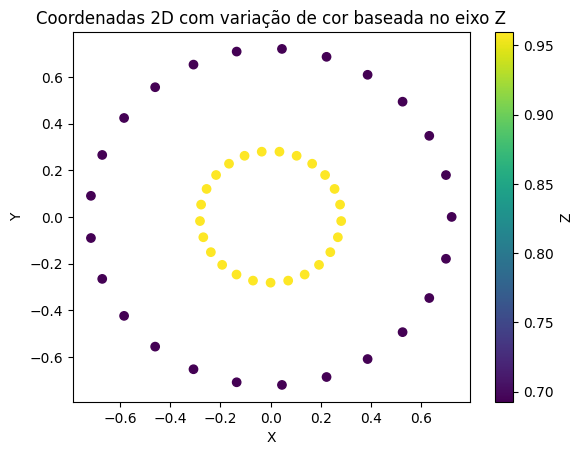

In [24]:
import numpy as np

import matplotlib.pyplot as plt

# Converter coordenate_list em um array numpy para facilitar a manipulação
coordenate_array = np.array(lights)

# Plotar as coordenadas
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Adicionar os pontos ao gráfico
ax.scatter(coordenate_array[:, 0], coordenate_array[:, 1], coordenate_array[:, 2], c='r', marker='o')

# Adicionar rótulos aos eixos
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Mostrar o gráfico
plt.show()


# Plotar as coordenadas em 2D com variação de cor baseada no eixo Z
plt.figure()
plt.scatter(coordenate_array[:, 0], coordenate_array[:, 1], c=coordenate_array[:, 2], cmap='viridis')
plt.colorbar(label='Z')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Coordenadas 2D com variação de cor baseada no eixo Z')
plt.show()

In [27]:
# Transformar coordenate_list em um array numpy
coordenate_array = np.array(coordenate_list)

# Salvar o array em formato .npy
np.save('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/coordenate_array.npy', coordenate_array)

In [23]:
import shutil
import os


# Exemplo de uso

path_l0 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_00/V_00/align/frame_00000.png'
path_l1 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_01/V_00/align/frame_00000.png'
path_l2 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_02/V_00/align/frame_00000.png'
path_l3 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_03/V_00/align/frame_00000.png'
path_l4 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_04/V_00/align/frame_00000.png'
path_l5 = '/home/lelis/Documents/Projetos/Stereo_Multifocus/datasets/00-DATA/scans/2017-06-05-1210/objs/sphere_00/2017-06-05-1210/L_05/V_00/align/frame_00000.png'

lista_path = [path_l0, path_l1, path_l2, path_l3, path_l4, path_l5]


# Defina o diretório de destino
dest_dir = '/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/imgs/'

# Crie o diretório de destino se ele não existir
os.makedirs(dest_dir, exist_ok=True)

# Copie as imagens para o diretório de destino


for idx, path in enumerate(lista_path):
    imagem = cv2.imread(path)
    # Normalizar a imagem para o intervalo [0, 1]
    imagem_normalizada = imagem.astype(np.float32) / (255.0*6)
    # Salvar a imagem normalizada em formato .png
    cv2.imwrite(os.path.join(dest_dir, f'image_{idx:02d}.png'), imagem)
    # Salvar a imagem normalizada em formato .npy
    np.save(os.path.join(dest_dir, f'image_{idx:02d}.npy'), imagem_normalizada)
print(f'Imagens salvas em formato .npy em {dest_dir}')
print(f'Imagens copiadas para {dest_dir}')

Imagens salvas em formato .npy em /home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/imgs/
Imagens copiadas para /home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/imgs/


In [26]:
import cv2

def converter_para_cinza(imagem_colorida):
    """
    Esta função recebe uma imagem colorida e a transforma em escala de cinza.
    
    Parâmetros:
    imagem_colorida (numpy.ndarray): A imagem colorida a ser transformada.
    
    Retorna:
    numpy.ndarray: A imagem em escala de cinza.
    """
    imagem_cinza = cv2.cvtColor(imagem_colorida, cv2.COLOR_BGR2GRAY)
    return imagem_cinza

In [27]:
import cv2

import matplotlib.pyplot as plt

# Função para exibir uma imagem
def exibir_imagem(caminho_imagem):
    # Ler a imagem usando OpenCV
    imagem = cv2.imread(caminho_imagem)
    # Converter a imagem de BGR para RGB
    imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
    # Exibir a imagem usando matplotlib
    plt.imshow(imagem_rgb)
    plt.axis('off')  # Ocultar os eixos
    plt.show()



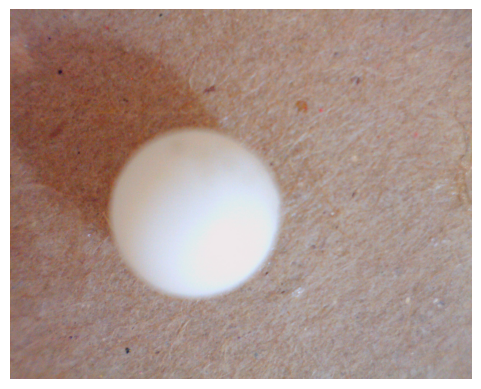

In [28]:
# Exemplo de uso
exibir_imagem(lista_path[0])

In [29]:
import cv2
import numpy as np

def criar_mascara_circulo(imagem_path):
    """
    Esta função cria uma máscara binária que possui apenas a localização do círculo branco em uma imagem.
    
    Parâmetros:
    imagem_path (str): O caminho para a imagem.
    
    Retorna:
    numpy.ndarray: A máscara binária com o círculo branco.
    """
    # Ler a imagem
    imagem = cv2.imread(imagem_path, cv2.IMREAD_GRAYSCALE)
    
    # Aplicar um limiar para criar uma imagem binária
    _, imagem_binaria = cv2.threshold(imagem, 170, 255, cv2.THRESH_BINARY)
    
    # Encontrar contornos na imagem binária
    contornos, _ = cv2.findContours(imagem_binaria, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Criar uma máscara vazia
    mascara = np.zeros_like(imagem)
    
    # Desenhar o contorno do círculo branco na máscara
    for contorno in contornos:
        if cv2.contourArea(contorno) > 100:  # Filtrar pequenos contornos
            cv2.drawContours(mascara, [contorno], -1, 255, thickness=cv2.FILLED)
    
    return mascara



In [30]:
# Exemplo de uso
#imagem_path = 'caminho/para/sua/imagem.png'
mascara = criar_mascara_circulo(lista_path[0])
cv2.imshow('Mascara', mascara)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [81]:
import numpy as np
import cv2

def criar_mascara_circulo_com_parametros(centro, raio, tamanho_imagem):
    """
    Esta função cria uma máscara binária com um círculo branco baseado no centro e raio fornecidos.
    
    Parâmetros:
    centro (tuple): As coordenadas (x, y) do centro do círculo.
    raio (int): O raio do círculo.
    tamanho_imagem (tuple): O tamanho da imagem (altura, largura).
    
    Retorna:
    numpy.ndarray: A máscara binária com o círculo branco.
    """
    # Criar uma máscara vazia
    mascara = np.zeros(tamanho_imagem, dtype=np.uint8)
    
    # Desenhar o círculo na máscara
    cv2.circle(mascara, centro, raio, 255 , thickness=cv2.FILLED)
    
    return mascara



In [82]:
dataset_result

,lx,ly,lz,R,M
0,0.56761,-0.554125,0.608904,224.089268,"[501, 561]"
1,-0.191779,-0.794351,0.576392,231.976292,"[512, 572]"
2,-0.708016,-0.226237,0.668978,250.840587,"[501, 560]"
3,-0.563351,0.499529,0.658108,236.89027,"[509, 566]"
4,0.229526,0.689811,0.686644,242.439683,"[512, 564]"
5,0.733394,0.214112,0.645205,233.002146,"[502, 557]"


In [83]:
# Exemplo de uso
centro = (501, 561)
raio = 225
tamanho_imagem = (1024, 1280)
mascara = criar_mascara_circulo_com_parametros(centro, raio, tamanho_imagem)

# Exibir a máscara resultante
cv2.imshow('Mascara', mascara)
cv2.waitKey(0)
cv2.destroyAllWindows()


cv2.imwrite('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/mascara.png', mascara)

True

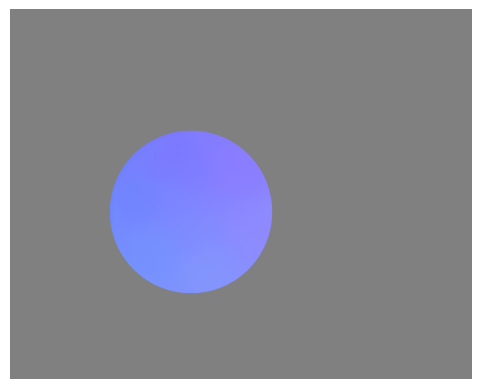

In [37]:
# Ler a imagem usando OpenCV
imagem = cv2.imread('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/normal map_screenshot_19.11.2024.png')
# Converter a imagem de BGR para RGB
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
#imagem_rgb = imagem_rgb[:,:,1]
# Exibir a imagem usando matplotlib
plt.imshow(imagem_rgb)
plt.axis('off')  # Ocultar os eixos
plt.show()

#exibir_imagem(lista_path[0][:,:,1] * mascara)

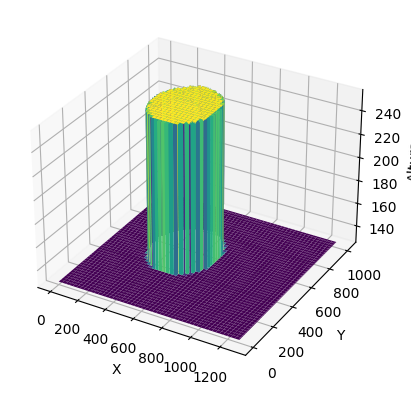

In [149]:
plotar_mapa_altura_3d(imagem_rgb[:,:,2])

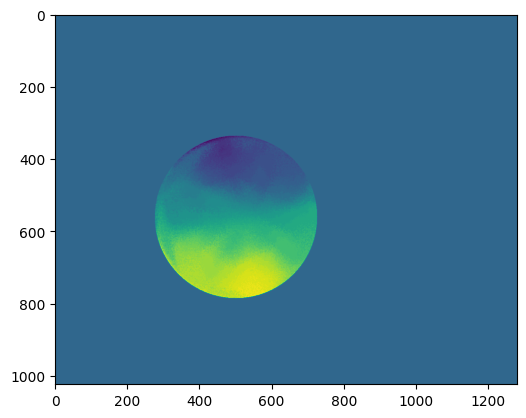

In [140]:
plt.imshow(imagem[:,:,1])

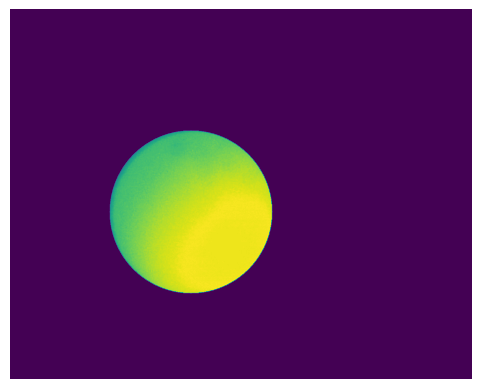

In [128]:
# Ler a imagem usando OpenCV
imagem = cv2.imread(lista_path[0])
# Converter a imagem de BGR para RGB
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_rgb = imagem_rgb[:,:,1]* mascara
# Exibir a imagem usando matplotlib
plt.imshow(imagem_rgb)
plt.axis('off')  # Ocultar os eixos
plt.show()

#exibir_imagem(lista_path[0][:,:,1] * mascara)

In [28]:
import cv2

def salvar_imagem(imagem, caminho_salvar):
    """
    Esta função salva uma imagem no caminho especificado.
    
    Parâmetros:
    imagem (numpy.ndarray): A imagem a ser salva.
    caminho_salvar (str): O caminho onde a imagem será salva.
    
    Retorna:
    None
    """
    cv2.imwrite(caminho_salvar, imagem)

In [38]:
print('---------------npy----------------\n\n')
for i in range(0,6):
    img_bunny_teste = np.load(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/imgs/image_0{i}.npy')
    print(f'min: {img_bunny_teste.min()}, max: {img_bunny_teste.max()}, shape: {img_bunny_teste.shape}')

print('\n\n---------------imagem----------------\n\n')
for i in range(0,6):
    img_bunny_teste = cv2.imread(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/imgs/image_0{i}.png')
    print(f'min: {img_bunny_teste.min()}, max: {img_bunny_teste.max()}, shape: {img_bunny_teste.shape}')

---------------npy----------------


min: 0.0, max: 0.16601307690143585, shape: (1024, 1280, 3)
min: 0.003267973894253373, max: 0.1666666716337204, shape: (1024, 1280, 3)
min: 0.0052287583239376545, max: 0.1666666716337204, shape: (1024, 1280, 3)
min: 0.0052287583239376545, max: 0.1666666716337204, shape: (1024, 1280, 3)
min: 0.006535947788506746, max: 0.1666666716337204, shape: (1024, 1280, 3)
min: 0.0013071895809844136, max: 0.16601307690143585, shape: (1024, 1280, 3)


---------------imagem----------------


min: 0, max: 254, shape: (1024, 1280, 3)
min: 5, max: 255, shape: (1024, 1280, 3)
min: 8, max: 255, shape: (1024, 1280, 3)
min: 8, max: 255, shape: (1024, 1280, 3)
min: 10, max: 255, shape: (1024, 1280, 3)
min: 2, max: 254, shape: (1024, 1280, 3)


In [39]:
for i in range(0,10):
    img_bunny_teste = np.load(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image00{i}.npy')
    print(f'min: {img_bunny_teste.min()}, max: {img_bunny_teste.max()}, shape: {img_bunny_teste.shape}')

print('\n\n---------------imagem----------------\n\n')

for i in range(0,10):
    img_bunny_teste = cv2.imread(f'/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image00{i}.jpg')
    print(f'min: {img_bunny_teste.min()}, max: {img_bunny_teste.max()}, shape: {img_bunny_teste.shape}')

min: 0.0, max: 0.1599510759115219, shape: (256, 256, 3)
min: 0.0, max: 0.16052770614624023, shape: (256, 256, 3)
min: 0.0, max: 0.16114214062690735, shape: (256, 256, 3)
min: 0.0, max: 0.16074073314666748, shape: (256, 256, 3)
min: 0.0, max: 0.16058127582073212, shape: (256, 256, 3)
min: 0.0, max: 0.16026531159877777, shape: (256, 256, 3)
min: 0.0, max: 0.16001015901565552, shape: (256, 256, 3)
min: 0.0, max: 0.16000881791114807, shape: (256, 256, 3)
min: 0.0, max: 0.15996721386909485, shape: (256, 256, 3)
min: 0.0, max: 0.15997740626335144, shape: (256, 256, 3)


---------------imagem----------------


min: 0, max: 44, shape: (256, 256, 3)
min: 0, max: 45, shape: (256, 256, 3)
min: 0, max: 45, shape: (256, 256, 3)
min: 0, max: 47, shape: (256, 256, 3)
min: 0, max: 46, shape: (256, 256, 3)
min: 0, max: 46, shape: (256, 256, 3)
min: 0, max: 45, shape: (256, 256, 3)
min: 0, max: 45, shape: (256, 256, 3)
min: 0, max: 46, shape: (256, 256, 3)
min: 0, max: 45, shape: (256, 256, 3)


In [89]:
x = 44/0.15
x

293.33333333333337

## Lendo resultados
---

In [39]:
def plotar_mapa_altura_3d(mapa_altura,scale):
    """
    Esta função recebe um mapa de altura (numpy.ndarray) e plota em 3D.
    
    Parâmetros:
    mapa_altura (numpy.ndarray): O mapa de altura a ser plotado.
    
    Retorna:
    None
    """
    # Criar uma grade de coordenadas X e Y
    x = np.arange(mapa_altura.shape[1])
    y = np.arange(mapa_altura.shape[0])
    x, y = np.meshgrid(x, y)
    
    # Criar a figura e o eixo 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_zlim(0, 3)
    
    # Plotar a superfície
    ax.plot_surface(x, y, mapa_altura/scale, cmap='viridis')
    
    # Adicionar rótulos aos eixos
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Altura')
    
    # Mostrar o gráfico
    plt.show()


def plotar_canais_3d(imagem):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})

    x = np.arange(imagem.shape[1])
    y = np.arange(imagem.shape[0])
    x, y = np.meshgrid(x, y)

    axs[0].plot_surface(x, y, imagem[:, :, 0], cmap='viridis')
    axs[0].set_title('Canal 0')
    axs[0].set_xlabel('X')
    axs[0].set_ylabel('Y')
    axs[0].set_zlabel('Altura')

    axs[1].plot_surface(x, y, imagem[:, :, 1], cmap='viridis')
    axs[1].set_title('Canal 1')
    axs[1].set_xlabel('X')
    axs[1].set_ylabel('Y')
    axs[1].set_zlabel('Altura')

    axs[2].plot_surface(x, y, imagem[:, :, 2], cmap='viridis')
    axs[2].set_title('Canal 2')
    axs[2].set_xlabel('X')
    axs[2].set_ylabel('Y')
    axs[2].set_zlabel('Altura')

    plt.show()

def save_image_as_npy(image_array, file_path):
    """
    Save an image array to a .npy file.

    Parameters:
    image_array (numpy.ndarray): The image array to be saved.
    file_path (str): The path where the .npy file will be saved.
    """
    np.save(file_path, image_array)
    print(f"Image saved to {file_path}")


In [60]:
# Caminho para o arquivo .npy
caminho_imagem_npy = '/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex14_muff/normal_map.npy'

imagem_npy = ler_arquivo_npy(caminho_imagem_npy)
imagem_npy.shape


NameError: name 'ler_arquivo_npy' is not defined

In [61]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
imagem_npy = np.load('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex14_muff/normal_map.npy')

In [51]:
bunny_img = np.load('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/normal_map.npy')
bunny_img.shape

(256, 256, 3)

In [52]:
def plotar_canais(imagem):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(imagem[:,:,0])
    axs[0].set_title('Canal 0')
    axs[0].axis('off')

    axs[1].imshow(imagem[:,:,1])
    axs[1].set_title('Canal 1')
    axs[1].axis('off')

    axs[2].imshow(imagem[:,:,2])
    axs[2].set_title('Canal 2')
    axs[2].axis('off')
    # Informações estatísticas
    print("Informações estatísticas dos canais:")
    for i in range(3):
        canal = imagem[:, :, i]
        print(f"Canal {i}:")
        print(f"  Mínimo: {canal.min()}")
        print(f"  Máximo: {canal.max()}")
        print(f"  Média: {canal.mean()}")
        print(f"  Desvio Padrão: {canal.std()}")
    plt.show()


Informações estatísticas dos canais:
Canal 0:
  Mínimo: -0.5487593397069808
  Máximo: 0.6004935079121562
  Média: 0.0020021210428761687
  Desvio Padrão: 0.1315772837694335
Canal 1:
  Mínimo: -0.5882051661479533
  Máximo: 0.5153983026795683
  Média: -0.0008733599816407971
  Desvio Padrão: 0.12865207208276905
Canal 2:
  Mínimo: 0.0
  Máximo: 0.9999236694020621
  Média: 0.16015749156593756
  Desvio Padrão: 0.3445559235199842


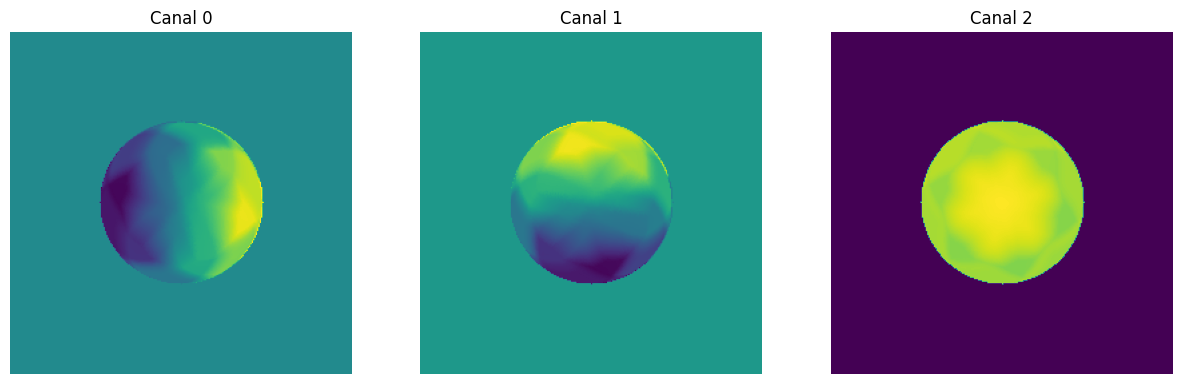

In [62]:
#plotar_canais(bunny_img)  
#plotar_canais_3d(bunny_img)

plotar_canais(imagem_npy)  
#plotar_canais_3d(imagem_npy)

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normal_to_height(normal_map, scale=1.0):
    # Carrega o mapa de normal
    #normal_map = cv2.imread(normal_map_path, cv2.IMREAD_COLOR)
    if normal_map is None:
        raise ValueError("Não foi possível carregar o mapa de normal.")
    
    # Normaliza o mapa de normal para o intervalo [0, 1]
    normal_map = normal_map.astype(np.float32) #/ 255.0
    
    # Extrai as componentes X, Y e Z dos vetores normais
    nx = normal_map[:, :, 0] #* 2 - 1  # Componente X (mapeada de 0-1 para -1 a 1)
    ny = normal_map[:, :, 1] # * 2 - 1  # Componente Y
    nxy = nx**2 + ny**2
    print(f'min: {nx.min()}, max: {nx.max()}')
    print(f'min: {ny.min()}, max: {ny.max()}')
    print(f'min: {nxy.min()}, max: {nxy.max()}')
    
    nz = sqrt(1 - nxy)  # Componente Z
    
    # Inicializa o mapa de altura
    height_map = np.zeros_like(nx, dtype=np.float32)
    
    # Integra os gradientes para calcular o mapa de altura
    for y in range(1, height_map.shape[0]):
        for x in range(1, height_map.shape[1]):
            height_map[y, x] = (
                height_map[y - 1, x] + ny[y, x] * scale +
                height_map[y, x - 1] + nx[y, x] * scale
            ) / 2  # Média entre os gradientes acumulados
    
    # Normaliza o mapa de altura para o intervalo [0, 255]
    min_val, max_val = np.min(height_map), np.max(height_map)
    print(f"Valores mínimos e máximos do mapa de altura: {min_val}, {max_val}")
    height_map = cv2.normalize(height_map, None, 0, 255, cv2.NORM_MINMAX)
    height_map = height_map.astype(np.uint8)
    
    return height_map




In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normal_to_height(normal_map, scale=1.0):
    """
    Converte um mapa de normal em um mapa de altura.
    :param normal_map: Mapa de normal no intervalo [-1, 1]
    :param scale: Fator de escala para os gradientes.
    :return: Mapa de altura.
    """
    # Extrai as componentes x, y e z
    nx = normal_map[:, :, 0] #* 2 - 1  # Componente X (convertida para -1 a 1)
    ny = -normal_map[:, :, 1] #* 2 - 1  # Componente Y
    #nz = normal_map[:, :, 2] #* 2 - 1  # Componente Z (geralmente não usado para altura)

    # Inicializa o mapa de altura como uma matriz zerada
    height_map = np.zeros_like(nx, dtype=np.float32)
    
    # Integra os gradientes para calcular o mapa de altura
    for y in range(1, height_map.shape[0]):
        for x in range(1, height_map.shape[1]):
            height_map[y, x] = (
                height_map[y - 1, x] + ny[y, x] * scale +
                height_map[y, x - 1] + nx[y, x] * scale
            ) / 2  # Média entre os gradientes acumulados

    # Normaliza o mapa de altura para o intervalo [0, 1]
    min_val, max_val = np.min(height_map), np.max(height_map)
    print(f"Valores mínimos e máximos do mapa de altura: {min_val}, {max_val}")
    height_map = (height_map - min_val) / (max_val - min_val)

    return height_map



Valores mínimos e máximos do mapa de altura: -23.668004989624023, 10.715807914733887


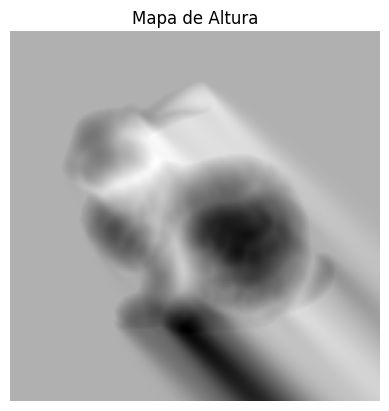

In [32]:


# Converte para mapa de altura
height_map = normal_to_height(bunny_img, scale=1.0)

# Salva e exibe o resultado
height_map_output = (height_map * 255).astype(np.uint8)
cv2.imwrite("height_map_corrected.png", height_map_output)
plt.imshow(height_map, cmap="gray")
plt.title("Mapa de Altura")
plt.axis("off")
plt.show()


Valores mínimos e máximos do mapa de altura: -13.608779907226562, 1.136880874633789


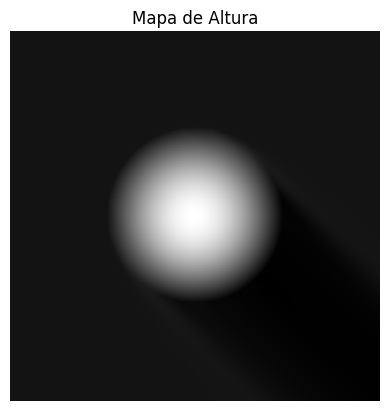

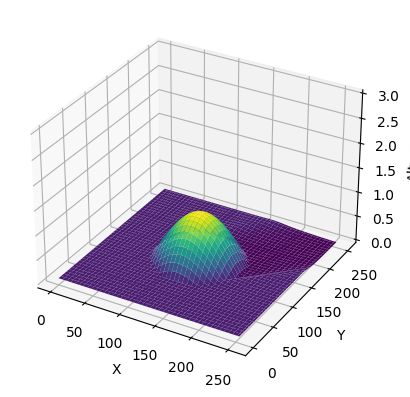

In [58]:


# Converte para mapa de altura
height_map = normal_to_height(imagem_npy, scale=0.5)
height_map = 1 - height_map/height_map.max()
#height_map = height_map * mascara

# Salva e exibe o resultado
height_map_output = (height_map * 255).astype(np.uint8)
cv2.imwrite("height_map_corrected.png", height_map_output)
plt.imshow(height_map, cmap="gray")
plt.title("Mapa de Altura")
plt.axis("off")
plt.show()


plotar_mapa_altura_3d(height_map,1)

Informações estatísticas dos canais:
Canal 0:
  Mínimo: -0.7925165509598862
  Máximo: 0.8087239157051851
  Média: 0.000987373633333295
  Desvio Padrão: 0.21072811075816722
Canal 1:
  Mínimo: -0.8417193712720176
  Máximo: 0.7689628325698716
  Média: -0.001048972199993392
  Desvio Padrão: 0.20813452761444767
Canal 2:
  Mínimo: 0.0
  Máximo: 0.9999215731502975
  Média: 0.12557773757977486
  Desvio Padrão: 0.273385722679594


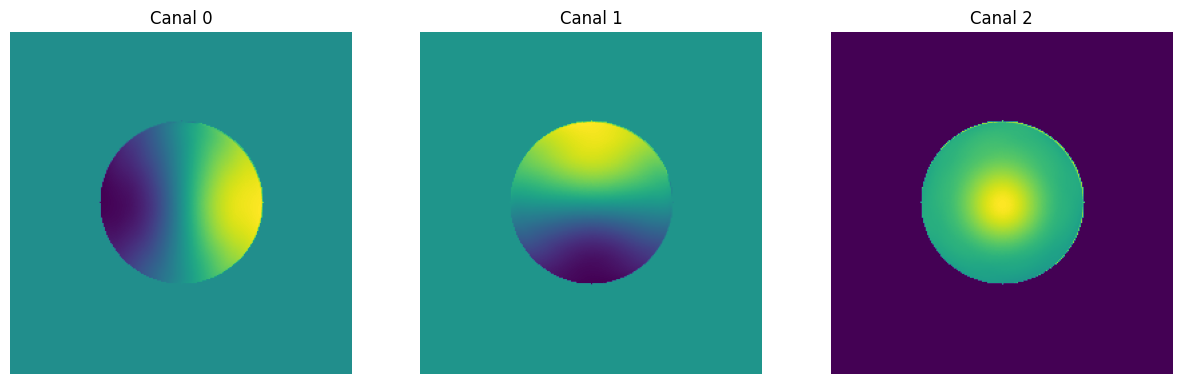

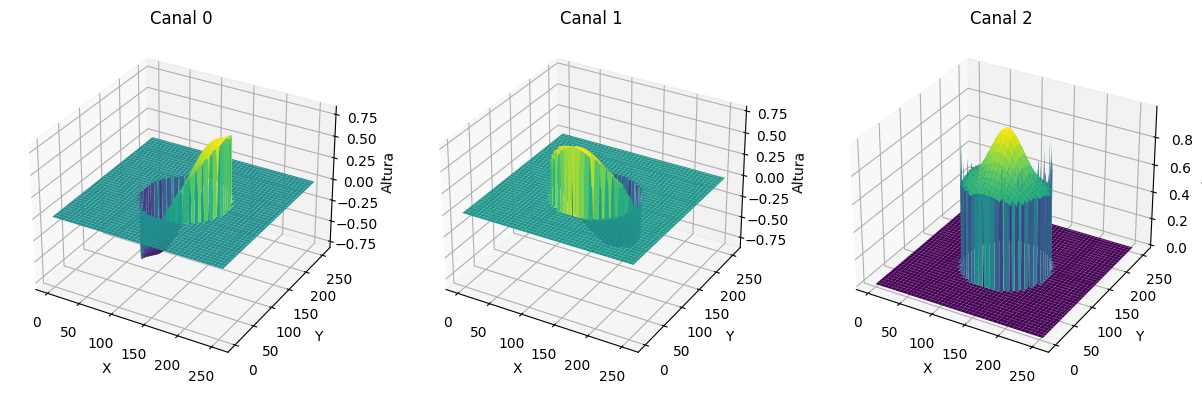

Valores mínimos e máximos do mapa de altura: -16.8544921875, 0.7660896182060242


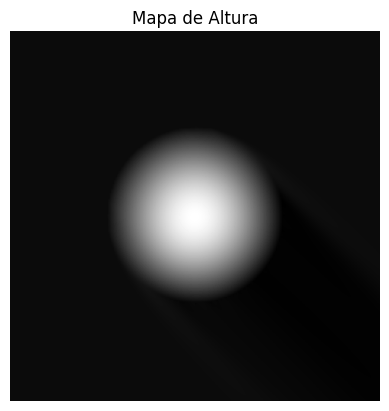

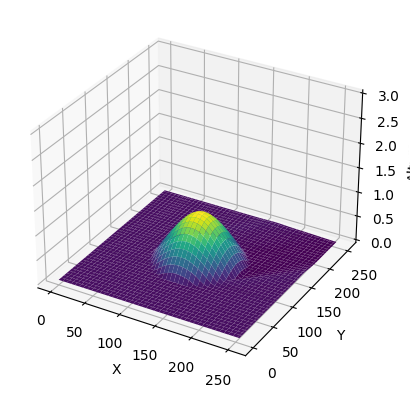

In [64]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
imagem_npy = np.load('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex14_muff/normal_map.npy')

plotar_canais(imagem_npy)  

plotar_canais_3d(imagem_npy)



# Converte para mapa de altura
height_map = normal_to_height(imagem_npy, scale=0.5)
height_map = 1 - height_map/height_map.max()
#height_map = height_map * mascara

# Salva e exibe o resultado
height_map_output = (height_map * 255).astype(np.uint8)
cv2.imwrite("height_map_corrected.png", height_map_output)
plt.imshow(height_map, cmap="gray")
plt.title("Mapa de Altura")
plt.axis("off")
plt.show()


plotar_mapa_altura_3d(height_map,1)

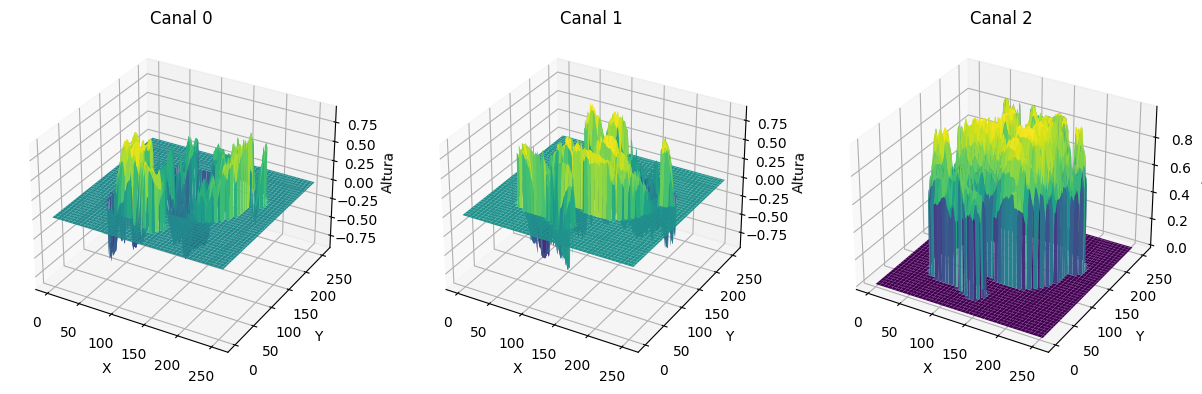

In [65]:
plotar_canais_3d(bunny_img)

In [42]:


# Converte para mapa de altura
height_map = normal_to_height(imagem_npy, scale=0.5)
height_map = 1 - height_map/height_map.max()
height_map = height_map * mascara

# Salva e exibe o resultado
height_map_output = (height_map * 255).astype(np.uint8)
cv2.imwrite("height_map_corrected.png", height_map_output)
plt.imshow(height_map, cmap="gray")
plt.title("Mapa de Altura")
plt.axis("off")
plt.show()


plotar_mapa_altura_3d(height_map,1)

Valores mínimos e máximos do mapa de altura: -8.685490608215332, 1.786460518836975


NameError: name 'mascara' is not defined

In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normal_to_height_with_nz(normal_map, scale=1.0, epsilon=1e-6):
    """
    Converte um mapa de normal em um mapa de altura considerando o componente n_z.
    :param normal_map: Mapa de normal já normalizado no intervalo [-1, 1].
    :param scale: Fator de escala para os gradientes.
    :param epsilon: Valor mínimo para evitar divisões por zero.
    :return: Mapa de altura.
    """
    # Extrai as componentes x, y e z do mapa de normal
    nx = normal_map[:, :, 0] # Componente X (-1 a 1)
    ny = normal_map[:, :, 1] # Componente Y (-1 a 1)
    nz = normal_map[:, :, 2] # Componente Z (-1 a 1)

    # Evita divisões por valores muito pequenos de n_z
    # nz = np.maximum(nz, epsilon)
    
    #matrix_ones = np.ones_like(nx)
    #nz = sqrt(np.maximum(epsilon**2*matrix_ones, matrix_ones - nx**2 - ny**2))
    
    # Inicializa o mapa de altura
    height_map = np.zeros_like(nx, dtype=np.float32)
    
    #deduz nz a partir de nx e ny
    for y in range(1, height_map.shape[0]):
        for x in range(1, height_map.shape[1]):
            nz[y,x] = sqrt(max(epsilon**2, 1 - nx[y,x]**2 - ny[y,x]**2))


    # Calcula os gradientes ajustados
    grad_x = -nx / nz  # Gradiente em relação a x
    grad_y = -ny / nz  # Gradiente em relação a y



    # Integra os gradientes para calcular o mapa de altura
    for y in range(1, height_map.shape[0]):
        for x in range(1, height_map.shape[1]):
            height_map[y, x] = (
                height_map[y - 1, x] + grad_y[y, x] * scale +
                height_map[y, x - 1] + grad_x[y, x] * scale
            ) / 2  # Média entre os gradientes acumulados

    # Normaliza o mapa de altura para o intervalo [0, 1]
    min_val, max_val = np.min(height_map), np.max(height_map)
    print(f"Valores mínimos e máximos do mapa de altura: {min_val}, {max_val}")
    height_map = (height_map - min_val) / (max_val - min_val)

    return height_map




/tmp/ipykernel_75036/3416520556.py:34: RuntimeWarning: invalid value encountered in divide
  grad_x = -nx / nz  # Gradiente em relação a x
/tmp/ipykernel_75036/3416520556.py:35: RuntimeWarning: invalid value encountered in divide
  grad_y = -ny / nz  # Gradiente em relação a y


Valores mínimos e máximos do mapa de altura: 0.0, 18.599607467651367


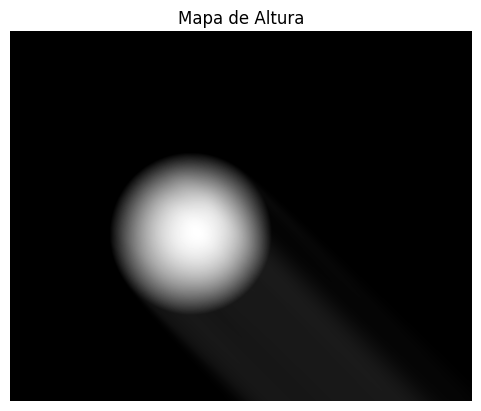

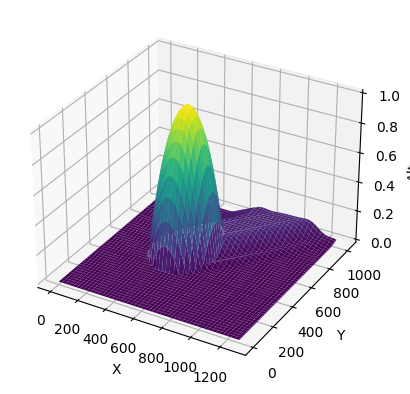

In [150]:


# Converte para mapa de altura
height_map = normal_to_height_with_nz(imagem_npy)
#height_map = 1 - height_map/height_map.max()
#height_map = height_map * mascara

# Salva e exibe o resultado
height_map_output = (height_map * 255).astype(np.uint8)
cv2.imwrite("height_map_corrected.png", height_map_output)
plt.imshow(height_map, cmap="gray")
plt.title("Mapa de Altura")
plt.axis("off")
plt.show()


plotar_mapa_altura_3d(height_map)

/tmp/ipykernel_75036/3416520556.py:34: RuntimeWarning: invalid value encountered in divide
  grad_x = -nx / nz  # Gradiente em relação a x
/tmp/ipykernel_75036/3416520556.py:35: RuntimeWarning: invalid value encountered in divide
  grad_y = -ny / nz  # Gradiente em relação a y


Valores mínimos e máximos do mapa de altura: -95.8910140991211, 61.78388214111328


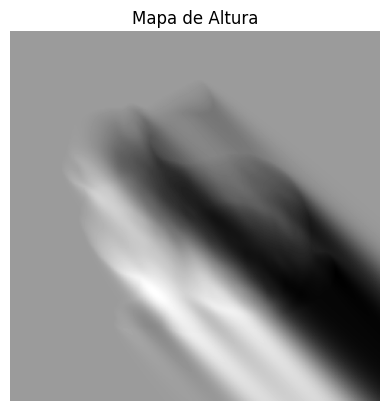

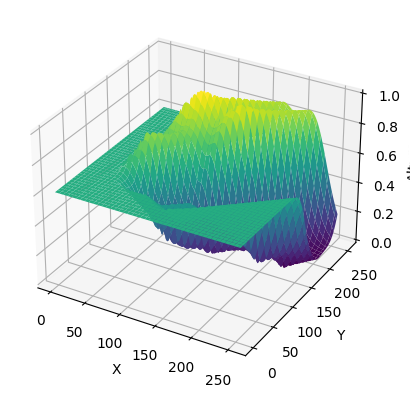

In [151]:


# Converte para mapa de altura
height_map = normal_to_height_with_nz(bunny_img)
#height_map = 1 - height_map/height_map.max()
#height_map = height_map * mascara

# Salva e exibe o resultado
height_map_output = (height_map * 255).astype(np.uint8)
cv2.imwrite("height_map_corrected.png", height_map_output)
plt.imshow(height_map, cmap="gray")
plt.title("Mapa de Altura")
plt.axis("off")
plt.show()


plotar_mapa_altura_3d(height_map)

In [152]:
bunny_img.min()

-0.9272457789488606

In [153]:
bunny_img.max()

1.0

In [205]:
def converter_npy_para_cinzama(matriz):
    """
    Esta função recebe uma matriz em formato .npy e a converte para escala de cinza.
    
    Parâmetros:
    matriz (numpy.ndarray): A matriz a ser convertida.
    
    Retorna:
    numpy.ndarray: A matriz em escala de cinza.
    """
    resultado = np.zeros_like(matriz[:,:,0])
    for y in range(matriz.shape[0]):
        for x in range(matriz.shape[1]):
            resultado[y,x] = 0.3*matriz[y,x,0] + 0.59*matriz[y,x,1] + 0.11*matriz[y,x,2]
    return resultado

In [ ]:
bunny_a_array = np.load('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image001.npy')
bunny_a_array = converter_npy_para_cinzama(bunny_a_array)

bunny_b = cv2.imread('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/bunny/bunny_lambert/image001.jpg')
bunny_b = converter_para_cinza(bunny_b)
bunny_b_array =np.array(bunny_b)

lista_plot = [(bunny_a_array[y,x], bunny_b_array[y,x]) for y in range(bunny_a_array.shape[0]) for x in range(bunny_a_array.shape[1])]
lista_plot = np.array(lista_plot)


plt.figure(figsize=(5,5))
plt.plot(lista_plot[:,0], lista_plot[:,1], 'o')
plt.show()

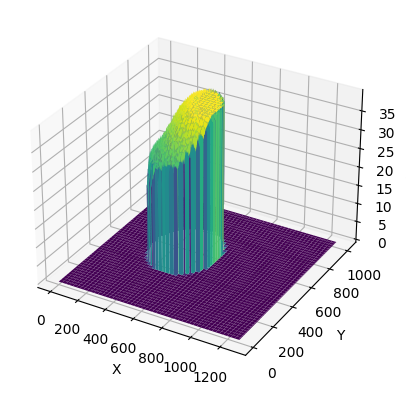

In [84]:
img_esfera = np.load('/home/lelis/Documents/Projetos/Photometric_Stereo/RobustPhotometricStereo/data/ex1_muff/imgs/image_00.npy')
img_esfera = 0.3 * img_esfera[:, :, 0] + 0.59 * img_esfera[:, :, 1] + 0.11 * img_esfera[:, :, 2]

plotar_mapa_altura_3d(img_esfera*mascara)